In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from IPython.display import Image
import numpy as np
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import imutils 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /content/gdrive

MyDrive  Shareddrives


In [4]:
# Augmentation and splitting 20% dataset for validation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    height_shift_range=0.2,
    shear_range=0.2,
    validation_split=0.2
)

#Training_generator
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/DATASET',  
        target_size=(224, 224),  
        batch_size=32,
        shuffle = True,
        class_mode='categorical')

#Validation_generator
validation_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/DATASET',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset='validation')

Found 600 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


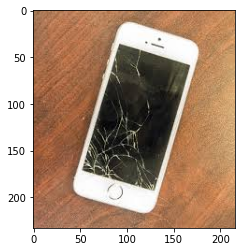

In [6]:
path = "/content/gdrive/MyDrive/DATASET/HP_SCREEN_BROKEN/image126.jpg"
img = cv2.imread(path)
plt.imshow(imutils.opencv2matplotlib(img))
plt.show()

In [10]:
#Model
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])
  return model

In [11]:
model=create_model()
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_generator,
          epochs=5,
          validation_data=validation_generator)

Epoch 1/5
19/19 [==============================] - 112s 6s/step - loss: 0.7647 - accuracy: 0.8667 - val_loss: 0.0284 - val_accuracy: 0.9917
Epoch 2/5
19/19 [==============================] - 82s 4s/step - loss: 0.1219 - accuracy: 0.9683 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 3/5
19/19 [==============================] - 81s 4s/step - loss: 0.1058 - accuracy: 0.9633 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 4/5
19/19 [==============================] - 79s 4s/step - loss: 0.0792 - accuracy: 0.9717 - val_loss: 0.0544 - val_accuracy: 0.9750
Epoch 5/5
19/19 [==============================] - 81s 4s/step - loss: 0.0758 - accuracy: 0.9767 - val_loss: 0.0344 - val_accuracy: 0.9917


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 128)     

Text(0.5, 1.0, 'Training and validation loss')

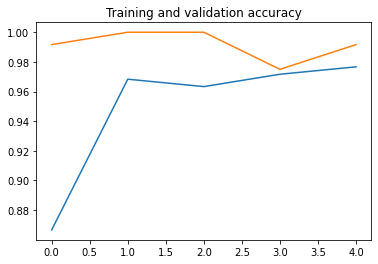

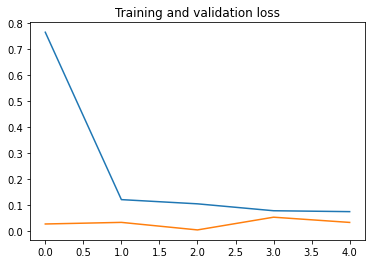

In [13]:
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [21]:
from keras.preprocessing import image
from IPython.display import Image
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
  
img_path = '/content/gdrive/MyDrive/TESTREAL/IMG_20220525_114108.jpg'
new_image = load_image(img_path)

pred1 = model.predict(new_image)

pred = np.argmax(pred1, axis=1)
pred

array([0])

In [29]:
model.save('imageclass')
reloaded_model = tf.keras.models.load_model('imageclass')

INFO:tensorflow:Assets written to: imageclass/assets


In [31]:
!zip -r /content/image_data.zip /content/imageclass

  adding: content/imageclass/ (stored 0%)
  adding: content/imageclass/assets/ (stored 0%)
  adding: content/imageclass/saved_model.pb (deflated 88%)
  adding: content/imageclass/keras_metadata.pb (deflated 91%)
  adding: content/imageclass/variables/ (stored 0%)
  adding: content/imageclass/variables/variables.index (deflated 65%)
  adding: content/imageclass/variables/variables.data-00000-of-00001 (deflated 9%)
